This demo uses dataset of raw T1 structual MRI images collected by Steve. 
==
After normalization. 
--
*Without* mean value subtracted
--
541 subjects in total.<p>
from 6 to 85 years old.<p>
10% for test, 90% for training.<p>
Because of the incompatible in the pixdim and dim, we get rid of three images from the dataset:

- A00058503
- A00058952
- A00059344

Two images are missing according to the phenotypic information:

- A00040181
- A00039084



In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from preprocess import *

# The raw image

## Some images looks like this:

Dimension:  (121, 145, 121)


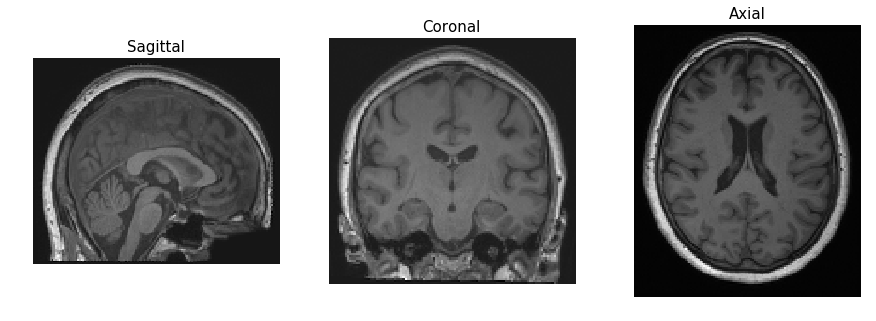

In [3]:
nii_img = nib.load('/media/woody/Elements/Steve_age_data/ANAT_normalized/A00008326.nii')
npy_img = nii_img.get_data()
print2d(npy_img)

## Finally, the images fed into the model is the .npy files read from .nii:

Dimension:  (121, 145, 121)


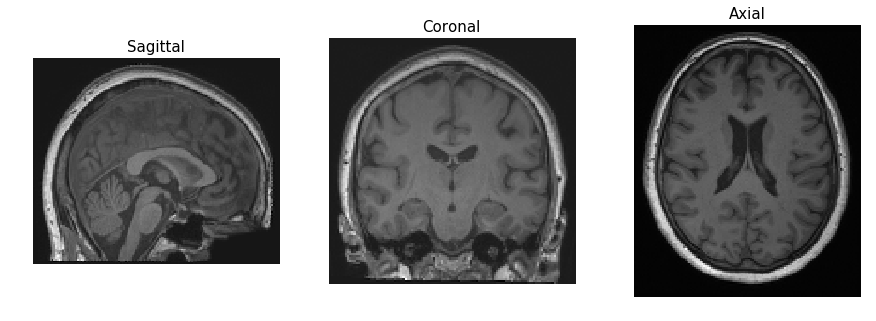

In [6]:
final_img = np.load('../data_npy/origin/A00008326.npy')
print2d(final_img)

# Training and test results
## Training process

Text(0.5, 1.0, "Target model's trainning loss")

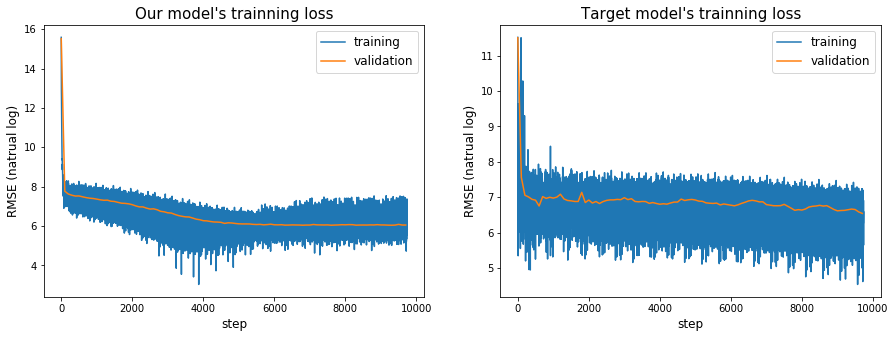

In [7]:
def subdraw(ax,filename):
    arr = np.load(filename)
    ax.plot(arr[0], np.log(arr[1]),label='training')
    ax.plot(arr[2], np.log(arr[3]),label='validation')
    ax.legend(fontsize=12)
    ax.set_xlabel('step',fontsize=12)
    ax.set_ylabel('RMSE (natrual log)',fontsize=12)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
subdraw(ax=ax1,filename='./img/demo_1_1_pltdata_2019.03.22.01:35:15.npy')
ax1.set_title('Our model\'s trainning loss',fontsize=15)
subdraw(ax=ax2,filename='./img/demo_1_2_pltdata_2019.03.22.03:03:00.npy')
ax2.set_title('Target model\'s trainning loss',fontsize=15)

## Test results

Text(0.5, 1.0, "Target model's test result, the correlation")

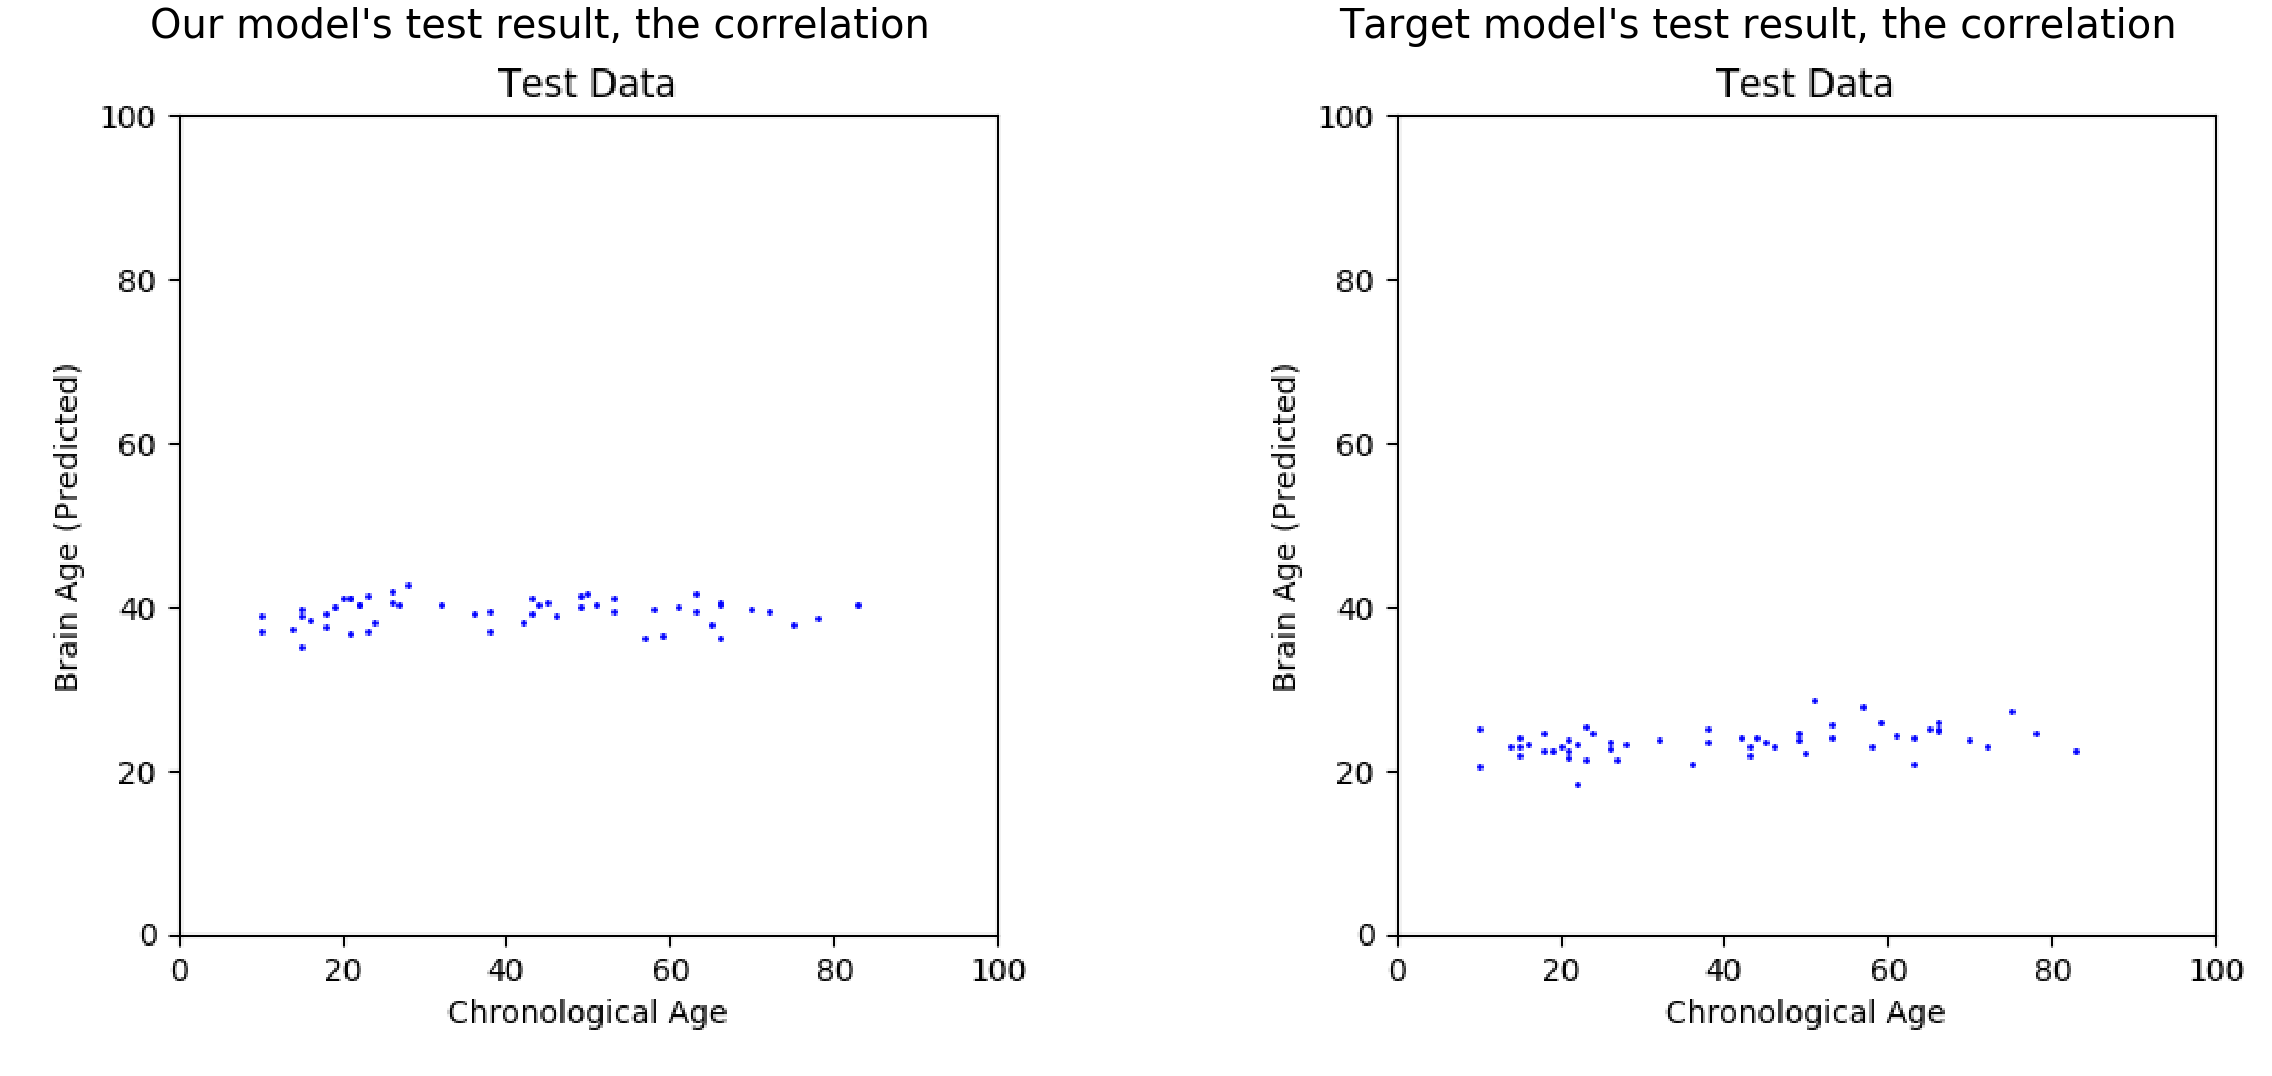

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(40,20))
ax1.imshow(plt.imread('./img/demo_1_1_test.png'))
ax1.axis('off')
ax1.set_title('Our model\'s test result, the correlation',fontsize=40)
ax2.imshow(plt.imread('./img/demo_1_2_test.png'))
ax2.axis('off')
ax2.set_title('Target model\'s test result, the correlation',fontsize=40)

# Conclusion
- Nothing special happend with this, which means it may not make too much difference whether or not subtracting the mean values.